# Group Project Proposal (G27)

## Introduction


A term deposit is one of the most important services provided by banks as it brings benefits to both parties, with customers being able to gain interest safely while the bank has the opportunity to gain a better return than the promised interest rate. Through this group project, we strive to answer the question, **what kind of customers are most likely to subscribe to a term deposit?** To answer this question, we use the Bank Marketing Data Set. This data set is based on a telemarketing campaign done by a Portuguese bank, which hopes to identify which customers would agree to subscribe to a term deposit. It has around 45000 instances, 20 attributes, and 1 output variable (y), the agreement or disagreement to a term deposit. 


## Preliminary exploratory data analysis

In [29]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readxl)
library(httr)
library(jsonlite)
library(ggplot2)
library(GGally)

#load the packages needed

In [30]:
BANK_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
GET(BANK_URL, write_disk(bk <- tempfile(fileext = ".zip")))

bank_data <- read_csv2(unz(bk, "bank-additional/bank-additional-full.csv"))%>%
            mutate(y = as_factor(y))
bank_data

unlink(bk)

# We unzip the data file and use the read_delim function to read it into R. 
# we mutate the column y as it's our factor for classification.
# The data set was created in a tidy format so there was no need to wrangle it. 

Response [https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip]
  Date: 2021-07-31 06:04
  Status: 200
  Content-Type: application/x-httpd-php
  Size: 445 kB
<ON DISK>  /tmp/Rtmpg0yp7j/file6b316fe3e4.zipNULL

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  .default = col_character(),
  age = col_double(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  emp.var.rate = col_number(),
  cons.price.idx = col_number(),
  cons.conf.idx = col_number(),
  euribor3m = col_number(),
  nr.employed = col_double()
)

See spec(...) for full column specifications.

Warning message:
“33425 parsing failures.
 row         col               expected actual         file
7764 nr.employed no trailing characters     .1 <connection>
7765 nr.employed no trailing characters     .1 <connection>
7766 nr.employed no trailing characters     .1 <connection>
7767 nr.employed no trailing characters     .1 <connection>
7768 nr.employed no trailing characters     .1 <connection>
.... ........... ...................... ...... ............
See problems(...) for more details.
”


age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,11,93994,-364,4857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,11,93994,-364,4857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,11,93994,-364,4857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,11,93994,-364,4857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,11,93994,-364,4857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,11,93994,-364,4857,5191,no
59,admin.,married,professional.course,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,11,93994,-364,4857,5191,no
41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,11,93994,-364,4857,5191,no
24,technician,single,professional.course,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,11,93994,-364,4857,5191,no


In [31]:
bank_data_selected <- bank_data %>%
    select(job, marital, housing,y)
bank_data_selected

# To avoid an overwhelming amount of unnecessary data, we select the four columns tightly linked to our question.

job,marital,housing,y
<chr>,<chr>,<chr>,<fct>
housemaid,married,no,no
services,married,no,no
services,married,yes,no
admin.,married,no,no
services,married,no,no
services,married,no,no
admin.,married,no,no
blue-collar,married,no,no
technician,single,yes,no


In [32]:
set.seed(42)
bank_split <- initial_split(bank_data_selected, prop = 0.7, strata = y)
bank_train <- training(bank_split)
bank_test <- testing(bank_split)

# we set the seed as we want to make sure the results are reproducible.
# We split the data into training sets and testing sets as we only want to train the training data for future predictions.

For further data analysis, we create data frames to summarize the data and bar charts to visualize the data. Each data frame summarized the observation of each attribute. We visualize the portion of yes and no across different attribute information using a bar chart to allow effective comparison.

`summarise()` regrouping output by 'marital' (override with `.groups` argument)



marital,y,n
<chr>,<fct>,<int>
divorced,no,2883
divorced,yes,344
married,no,15736
married,yes,1760
single,no,6915
single,yes,1136
unknown,no,50
unknown,yes,8


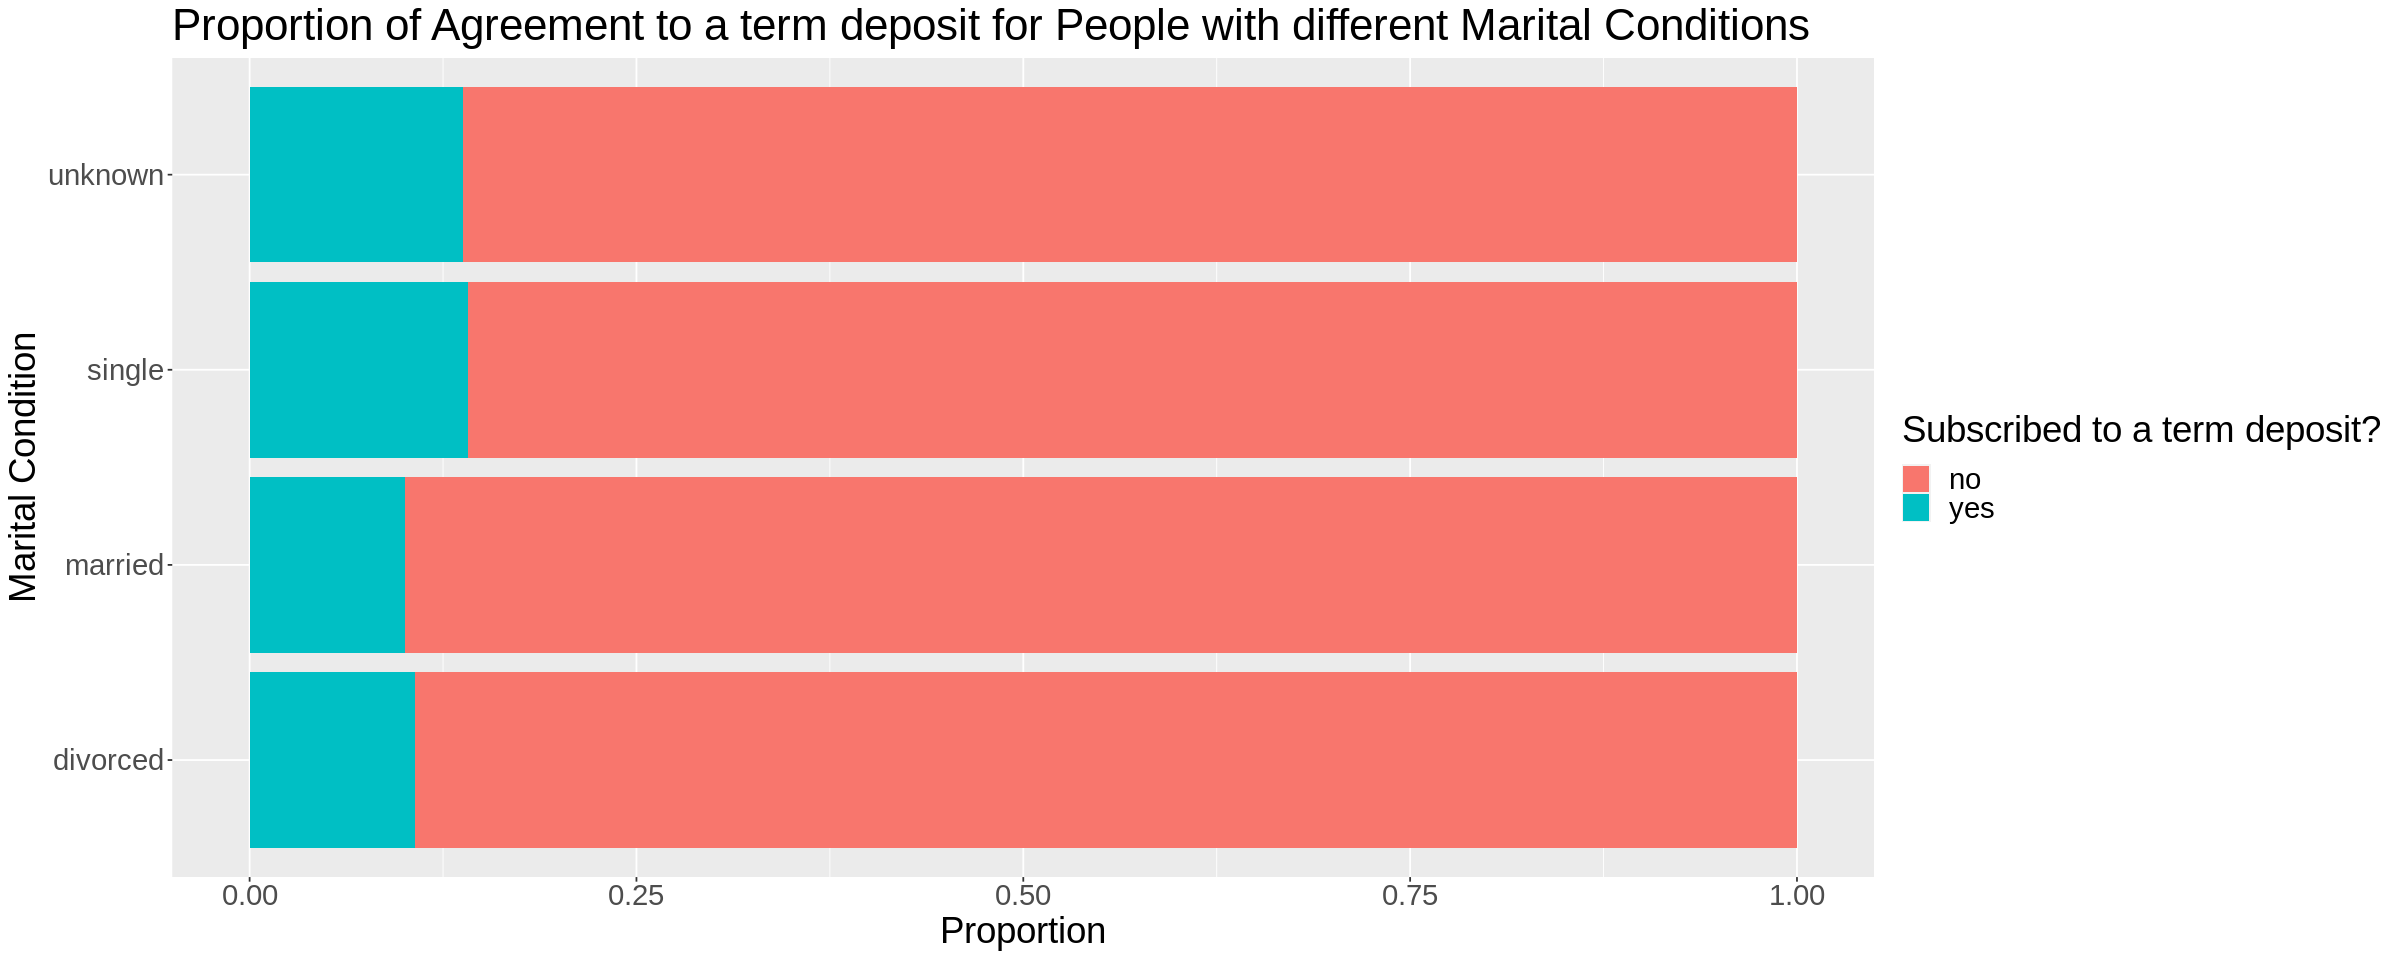

In [33]:
# summarize data about marital status
maritall <- bank_train %>%
group_by(marital,y) %>%
summarise(n = n())
maritall

# plot the data as bar chart for better comparison
options(repr.plot.width = 20, repr.plot.height = 8)

marital_bar <- maritall %>%
ggplot(aes(x = marital, y = n, fill = y))+
geom_bar(stat = "identity", position = "fill")+
labs(x = "Marital Condition", y = "Proportion", 
     fill = "Subscribed to a term deposit?")+
theme(text = element_text(size = 22))+
coord_flip() +
ggtitle("Proportion of Agreement to a term deposit for People with different Marital Conditions")

marital_bar

> Excluding the unknown group, the singles are more likely to subscribe to term deposits.

`summarise()` regrouping output by 'housing' (override with `.groups` argument)



housing,y,n
<chr>,<fct>,<int>
no,no,11634
no,yes,1398
unknown,no,627
unknown,yes,74
yes,no,13323
yes,yes,1776


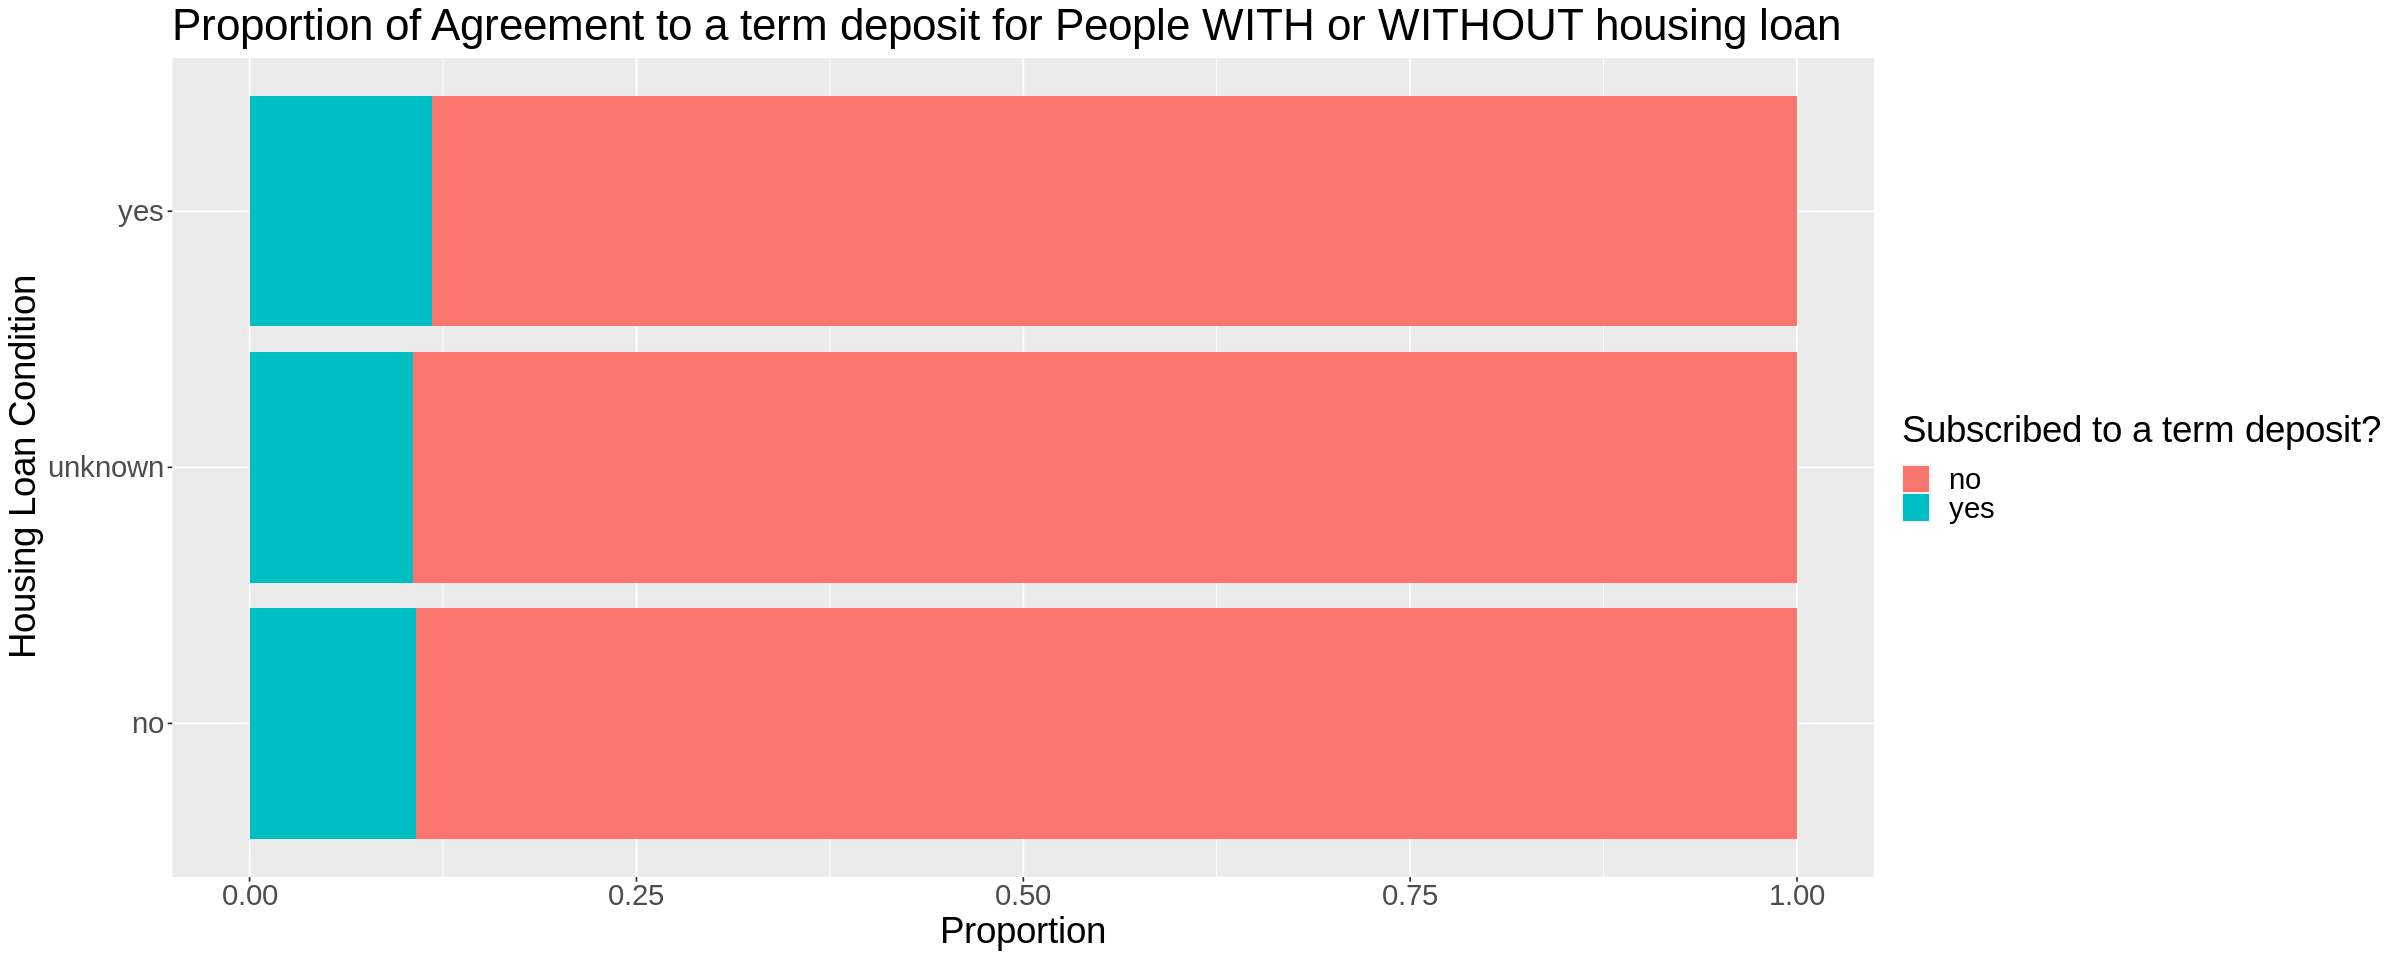

In [34]:
# summarize data about housing loans
housingg <- bank_train %>%
group_by(housing,y) %>%
summarise(n = n())
housingg

# plot the data as bar chart for better comparison
options(repr.plot.width = 20, repr.plot.height = 8)

housingg_bar <- housingg %>%
ggplot(aes(x = housing, y = n, fill = y))+
geom_bar(stat = "identity", position = "fill")+
labs(x = "Housing Loan Condition", y = "Proportion", 
     fill = "Subscribed to a term deposit?")+
theme(text = element_text(size = 22))+
coord_flip() +
ggtitle("Proportion of Agreement to a term deposit for People WITH or WITHOUT housing loan")

housingg_bar

> Customers who have housing loans are more likely to subscribe to the term deposit than the ones who do not have.

`summarise()` regrouping output by 'job' (override with `.groups` argument)



job,y,n
<chr>,<fct>,<int>
admin.,no,6413
admin.,yes,945
blue-collar,no,5977
blue-collar,yes,427
entrepreneur,no,921
entrepreneur,yes,88
housemaid,no,663
housemaid,yes,73
management,no,1829


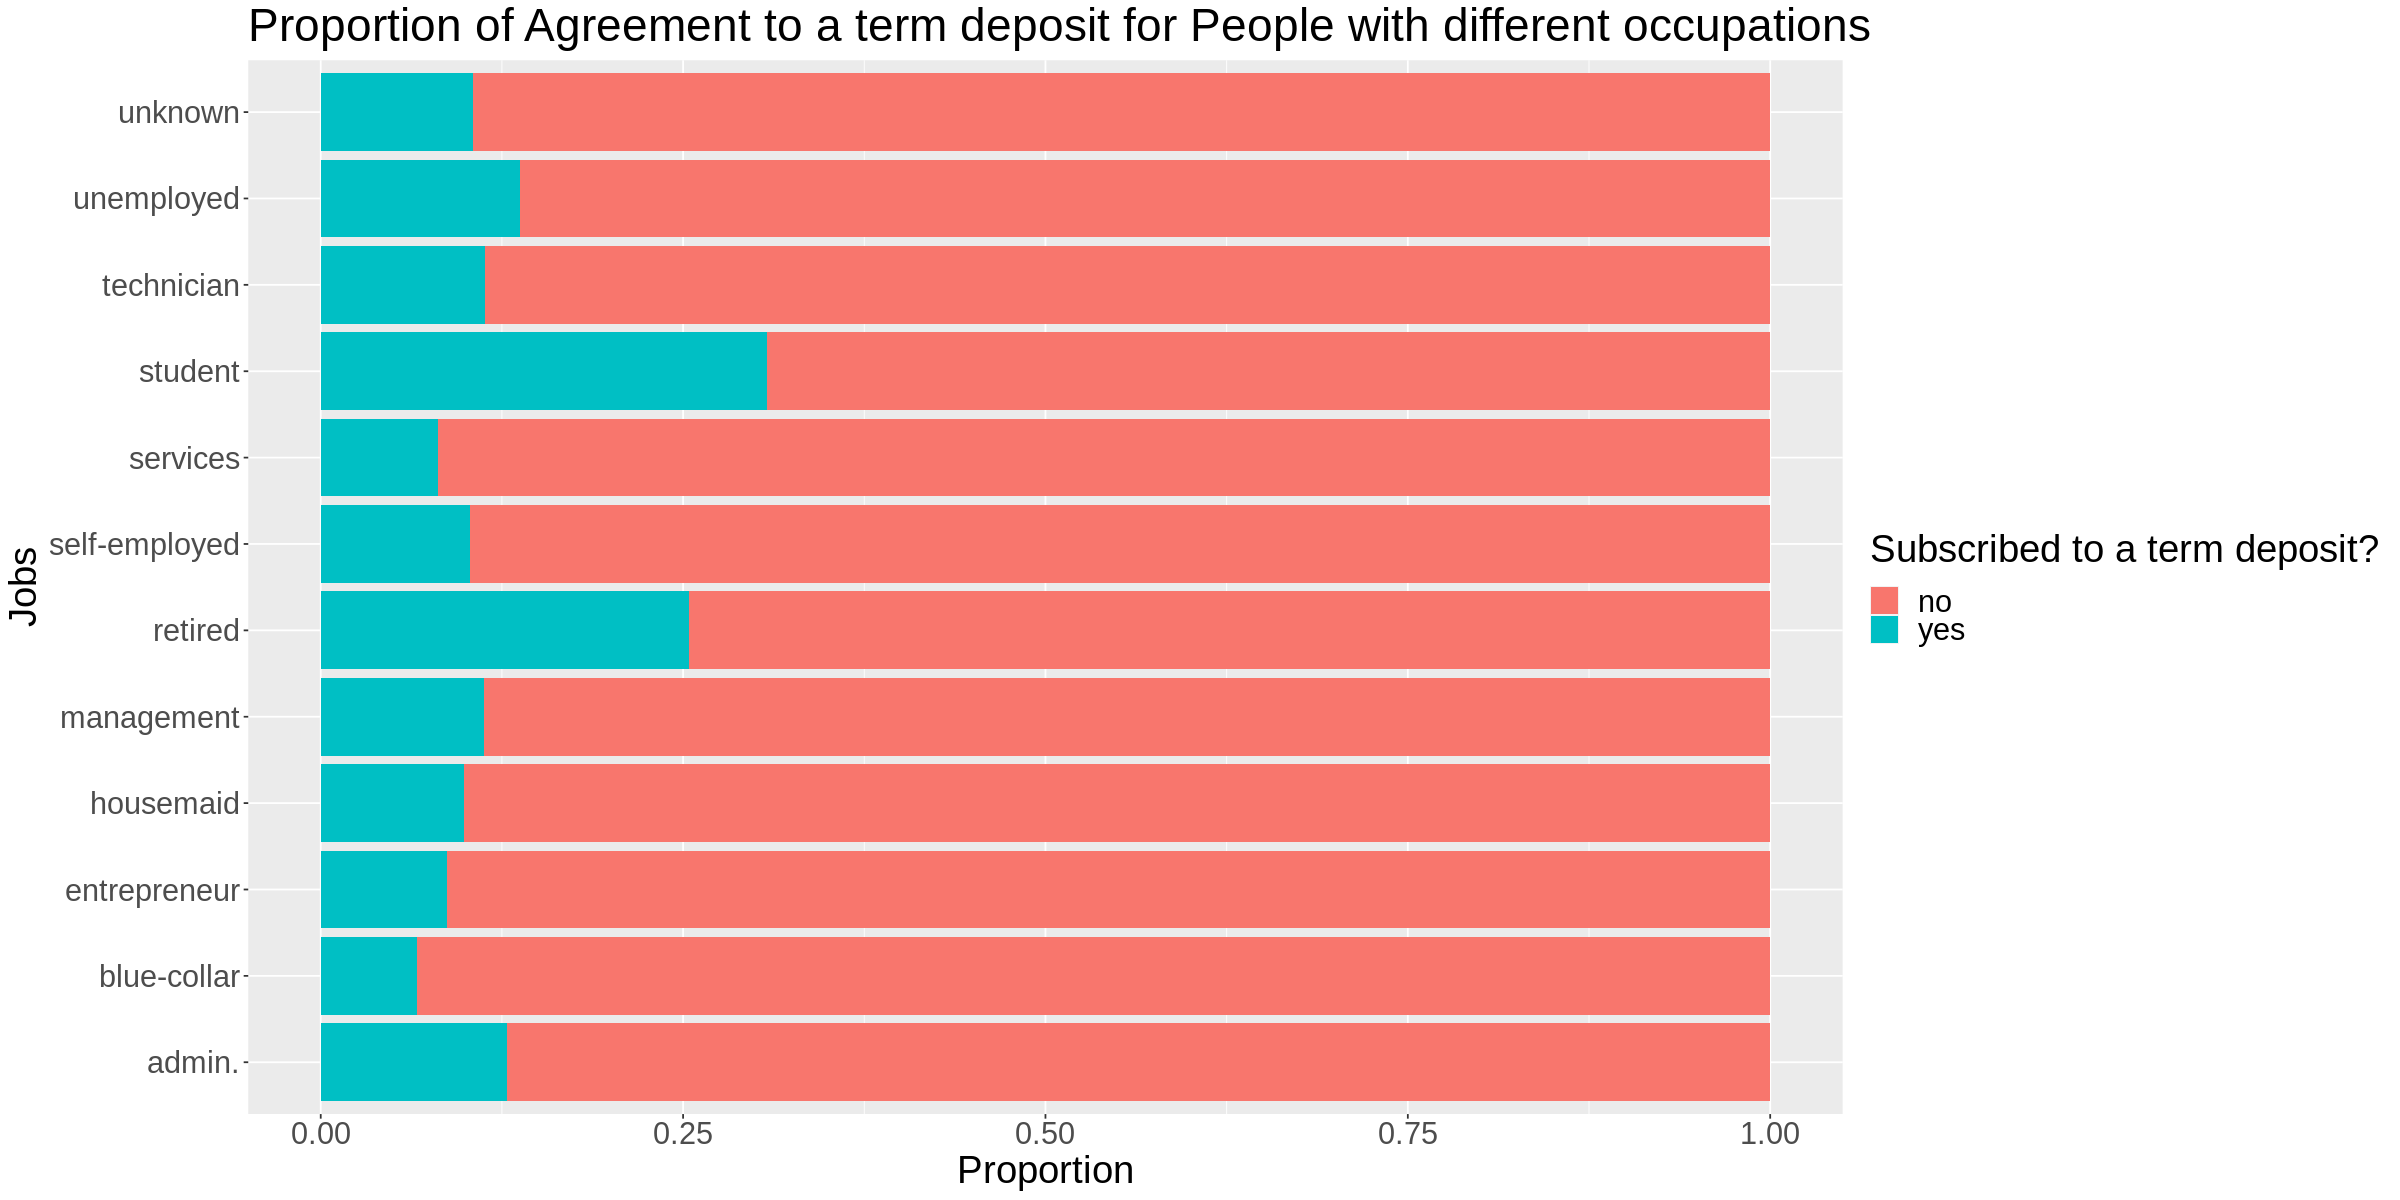

In [35]:
# summarize data about occupations
jobs <- bank_train %>%
group_by(job,y) %>%
summarise(n = n())
jobs

# plot the data as bar chart for better comparison
options(repr.plot.width = 20, repr.plot.height = 10)

housingg_bar <- jobs %>%
ggplot(aes(x = job, y = n, fill = y))+
geom_bar(stat = "identity", position = "fill")+
labs(x = "Jobs", y = "Proportion", 
     fill = "Subscribed to a term deposit?")+
theme(text = element_text(size = 23))+
coord_flip() +
ggtitle("Proportion of Agreement to a term deposit for People with different occupations")

housingg_bar

> “Student”, “retired” and “admin.” are the top 3 jobs that subscribe to the term deposit the most.

## Methods

In this data analysis, we use four columns: y, job, marital, and housing. We pick these three attributes since we believe that a person’s occupation, marital status and whether or not they have a housing loan have a significant impact on one’s financial decision. We use a bar chart to show the proportion of yes and no for each sub-category for each attribute. This can provide a clear and effective proportion comparison across different categories. 


This is a classification problem and we use the KNN model as we want to classify who will and who won’t subscribe to a term deposit. Since we have a large amount of data, we will split 70% for the training set, and 30% for the testing set, following one of the most common split ratios.

## Expected outcomes and significance

We expect that those who are retired, married, and have housing loans are the ones who are most likely to subscribe to a term deposit. 


As there are many diverse financial products available in the market, banks should focus on those who are most likely to subscribe to a term deposit. With our findings, banks would be able to find out their target customer group for term deposits and tailor their future marketing strategies in accordance. 


Further Questions: “Why are these customer groups more likely to subscribe to the term deposit?” and “How could the bank use their marketing strategies to encourage other customer groups to agree to subscribe to the term deposit?”